# Machine Learning - Laboratory 3

Created by: daniel.kucharczyk@pwr.edu.pl

**Deadline:** November 1

**Requirements**\
Reuse and modify your existing code from the previous lab as a starting point.\
Ensure that your implementations can work with any given loss function and its gradient.\
Test each method on at least two different optimization problems (e.g., linear regression and logistic regression).\
Compare the convergence rates and final performance of each method.

In [75]:
# Don't modify this line
import sys


sys.path.append("../")

In [76]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.optimizers import (
    AdaptiveGradientOptimizer,
    AdaptiveMomentEstimationOptimizer,
    MomentumGradientDescentOptimizer,
    NesterovAcceleratedGradientOptimizer,
    RMSpropOptimizer,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A description of each implemented method.

## Momentum Gradient Descent

Momentum Gradient Descent adds a momentum term to accumulate past gradients, which helps accelerate the convergence and avoid oscillations.

### Update rule:
$$
v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta_t)
$$
$$
\theta_{t+1} = \theta_t - \alpha v_t
$$

Where:
- $v_t$ is the velocity vector.
- $\beta$ is the momentum coefficient (typically 0.9).
- $\alpha$ is the learning rate.
- $\nabla J(\theta_t)$ is the gradient of the cost function.

---

## Nesterov Accelerated Gradient (NAG)

Nesterov Accelerated Gradient is similar to Momentum, but it evaluates the gradient at an estimated future position, leading to more efficient updates.

### Update rule:
$$
v_t = \beta v_{t-1} + \nabla J(\theta_t - \alpha \beta v_{t-1})
$$
$$
\theta_{t+1} = \theta_t - \alpha v_t
$$

Where:
- $v_t$ is the velocity vector.
- $\beta$ is the momentum coefficient (typically 0.9).
- $\alpha$ is the learning rate.
- $\nabla J(\theta_t - \alpha \beta v_{t-1})$ is the gradient evaluated at the estimated future position.

---

## AdaGrad (Adaptive Gradient)

AdaGrad adapts the learning rate for each parameter based on the historical gradients, making larger updates for infrequent features and smaller updates for frequent ones.

### Update rule:
$$
G_t = G_{t-1} + (\nabla J(\theta_t))^2
$$
$$
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} \odot \nabla J(\theta_t)
$$

Where:
- $G_t$ is the sum of squared gradients up to time $t$.
- $\epsilon$ is a small constant to avoid division by zero.
- $\odot$ denotes element-wise multiplication.

---

## RMSprop

RMSprop is an adaptation of AdaGrad that uses a moving average of squared gradients to avoid AdaGrad’s aggressive reduction in learning rates over time.

### Update rule:
$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta)(\nabla J(\theta_t))^2
$$
$$
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} \odot \nabla J(\theta_t)
$$

Where:
- $E[g^2]_t$ is the exponential moving average of squared gradients.
- $\beta$ is the decay rate (typically 0.9).
- $\epsilon$ is a small constant to avoid division by zero.

---

## Adam (Adaptive Moment Estimation)

Adam combines ideas from both Momentum and RMSprop. It keeps track of both the first moment (mean of gradients) and second moment (variance of gradients) to adapt learning rates.

### Update rule:
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla J(\theta_t)
$$
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2)(\nabla J(\theta_t))^2
$$
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$
$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$
$$
\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \odot \hat{m}_t
$$

Where:
- $m_t$ is the first moment estimate (mean of gradients).
- $v_t$ is the second moment estimate (uncentered variance of gradients).
- $\beta_1$ and $\beta_2$ are decay rates (typically 0.9 and 0.999, respectively).
- $\hat{m}_t$ and $\hat{v}_t$ are bias-corrected moment estimates.

---


# Gradient Descent Optimization of the Function $ f(x) = x^2 $

This section implements and compares various gradient descent optimization algorithms to minimize the quadratic cost function $ f(x) = x^2 $, a classic convex function with a unique global minimum at $ x = 0 $. The gradient of this function is defined as $ f'(x) = 2x $.

For each algorithm, the optimization path is plotted against the cost function $ f(x) = x^2 $. Additionally, subplots demonstrate the convergence for different learning rates, illustrating how each optimizer adapts to this simple convex function. This comparative visualization highlights the efficiency, stability, and speed of convergence of each algorithm.

In [77]:
# Define the cost function: f(x) = x^2
def cost_function(x):
    return x**2


# Define the gradient of the cost function: f'(x) = 2x
def gradient_function(x):
    return 2 * x

### Momentum GradientDescent Optimizer

In [78]:
# Create an instance of the optimizer
optimizer = MomentumGradientDescentOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

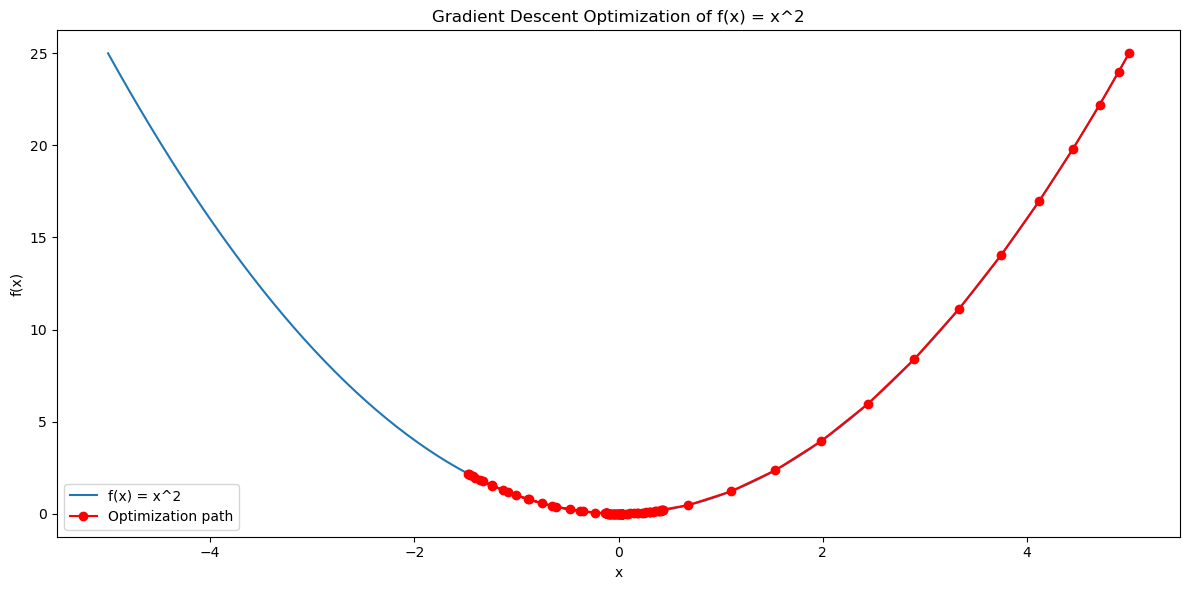

In [79]:
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

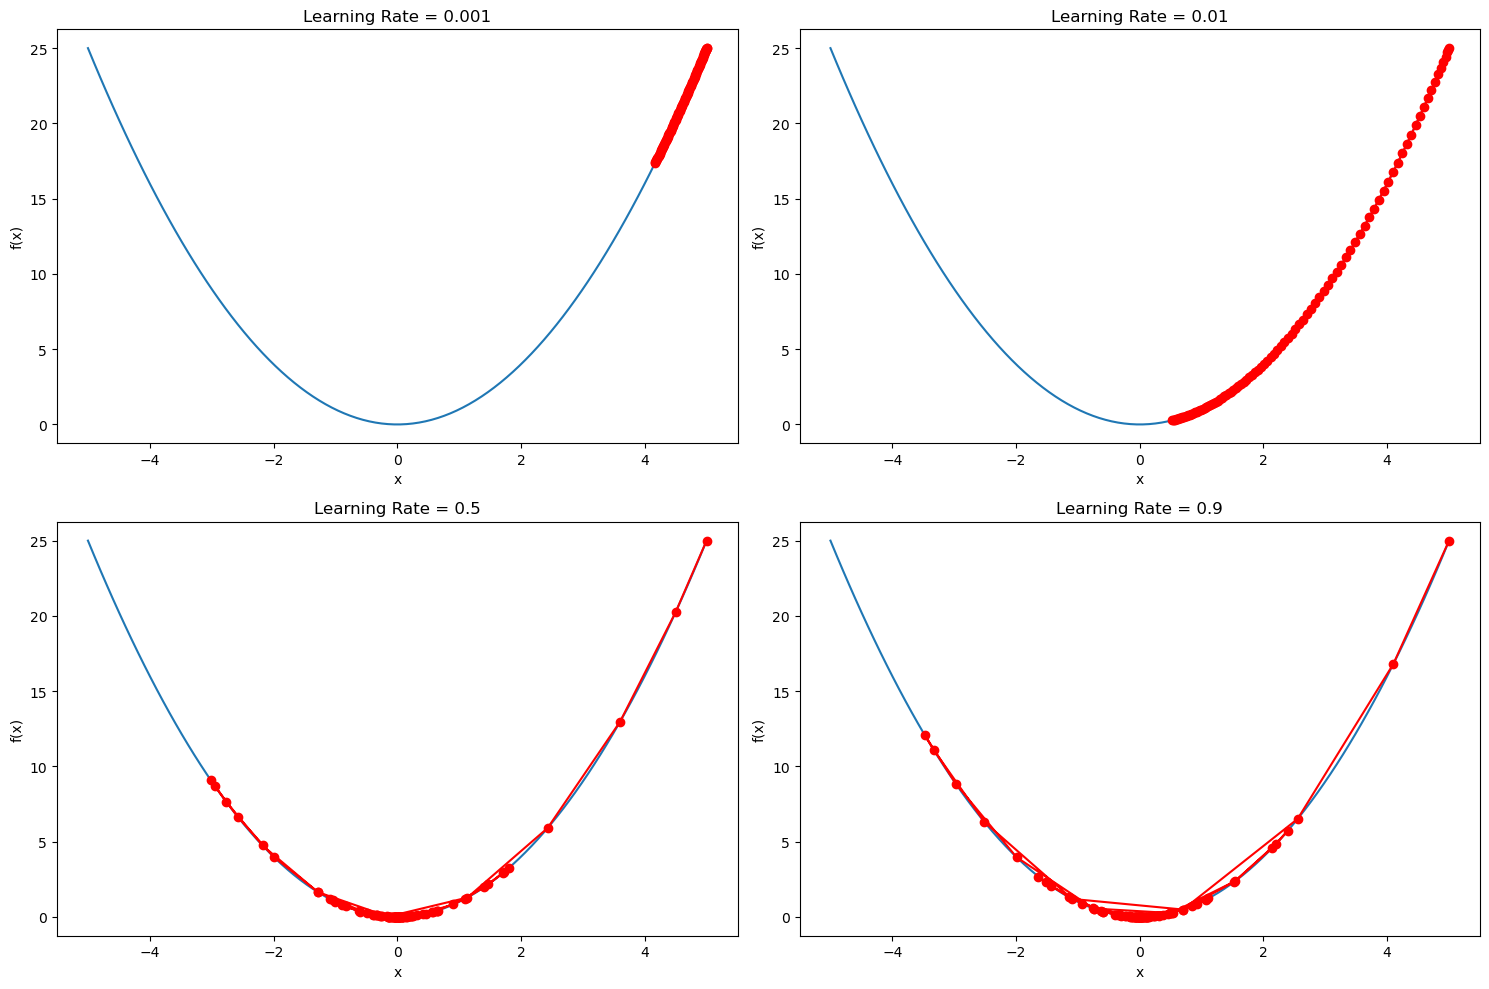

In [80]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = MomentumGradientDescentOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

### Nesterov Accelerated Gradient Optimizer

In [81]:
# Create an instance of the optimizer
optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

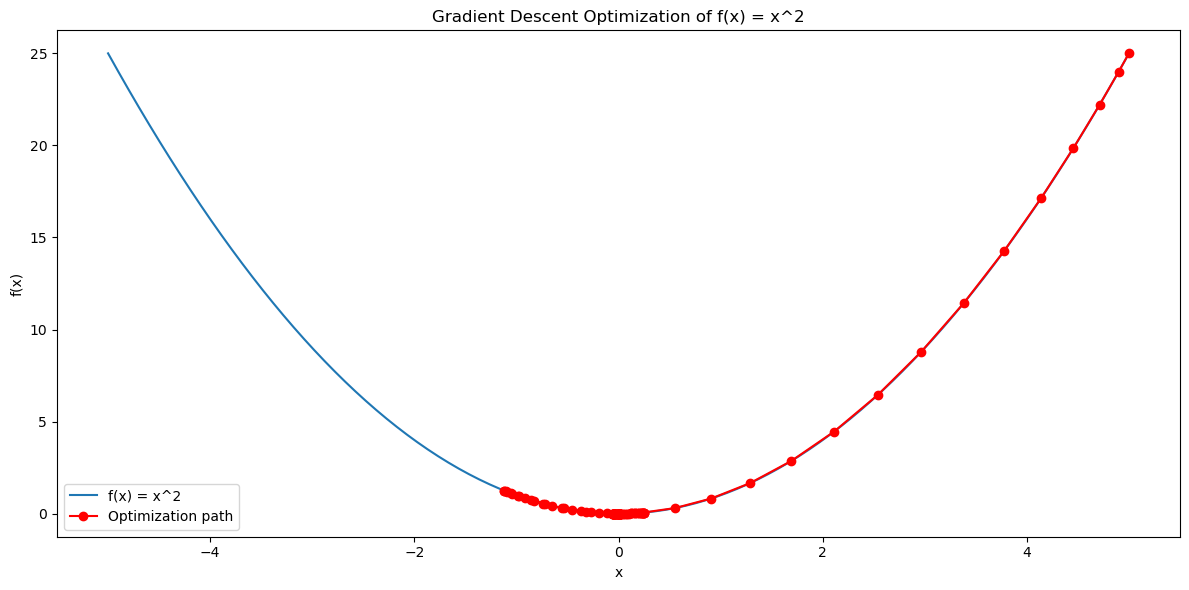

In [82]:
# Create an instance of the optimizer
optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

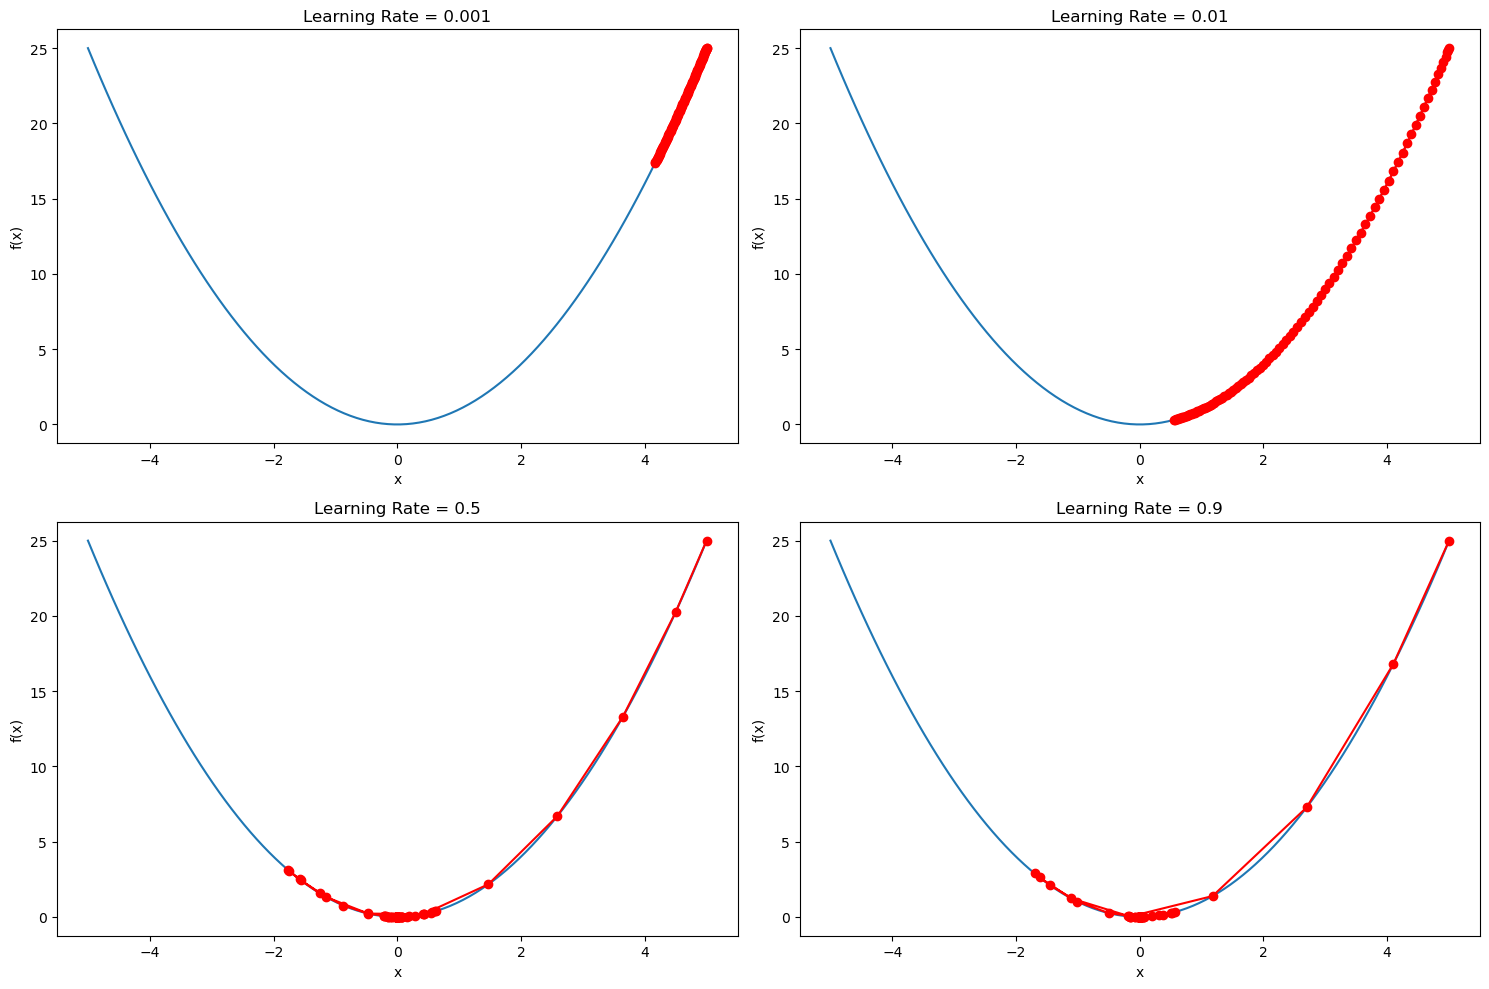

In [83]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

### Adaptive Gradient Optimizer

In [84]:
# Create an instance of the optimizer
optimizer = AdaptiveGradientOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

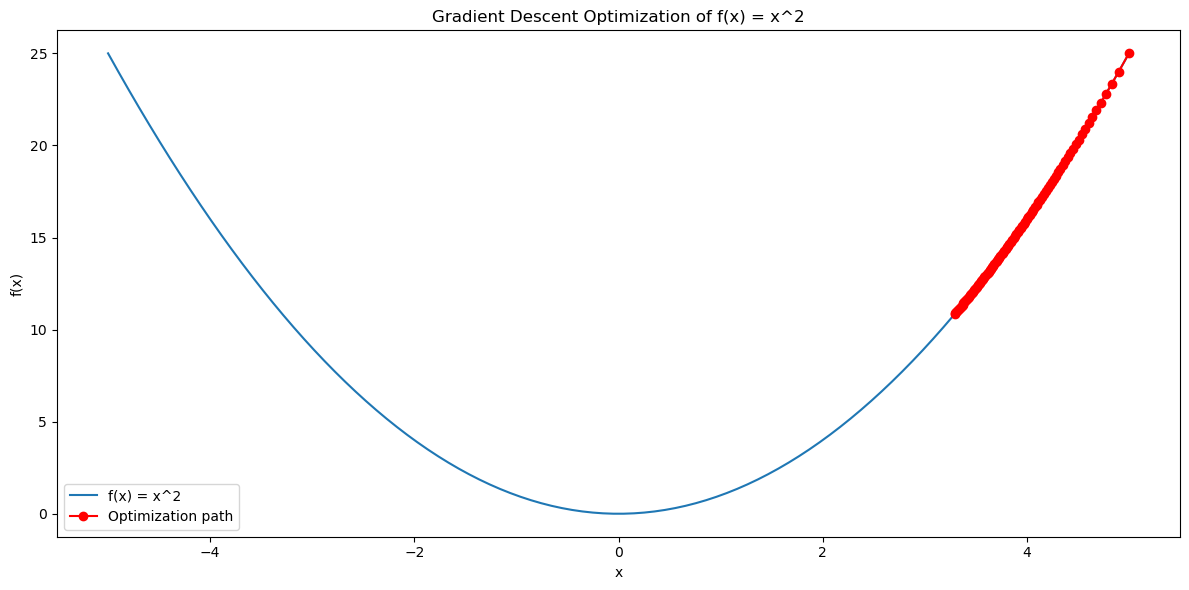

In [85]:
# Create an instance of the optimizer
optimizer = AdaptiveGradientOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

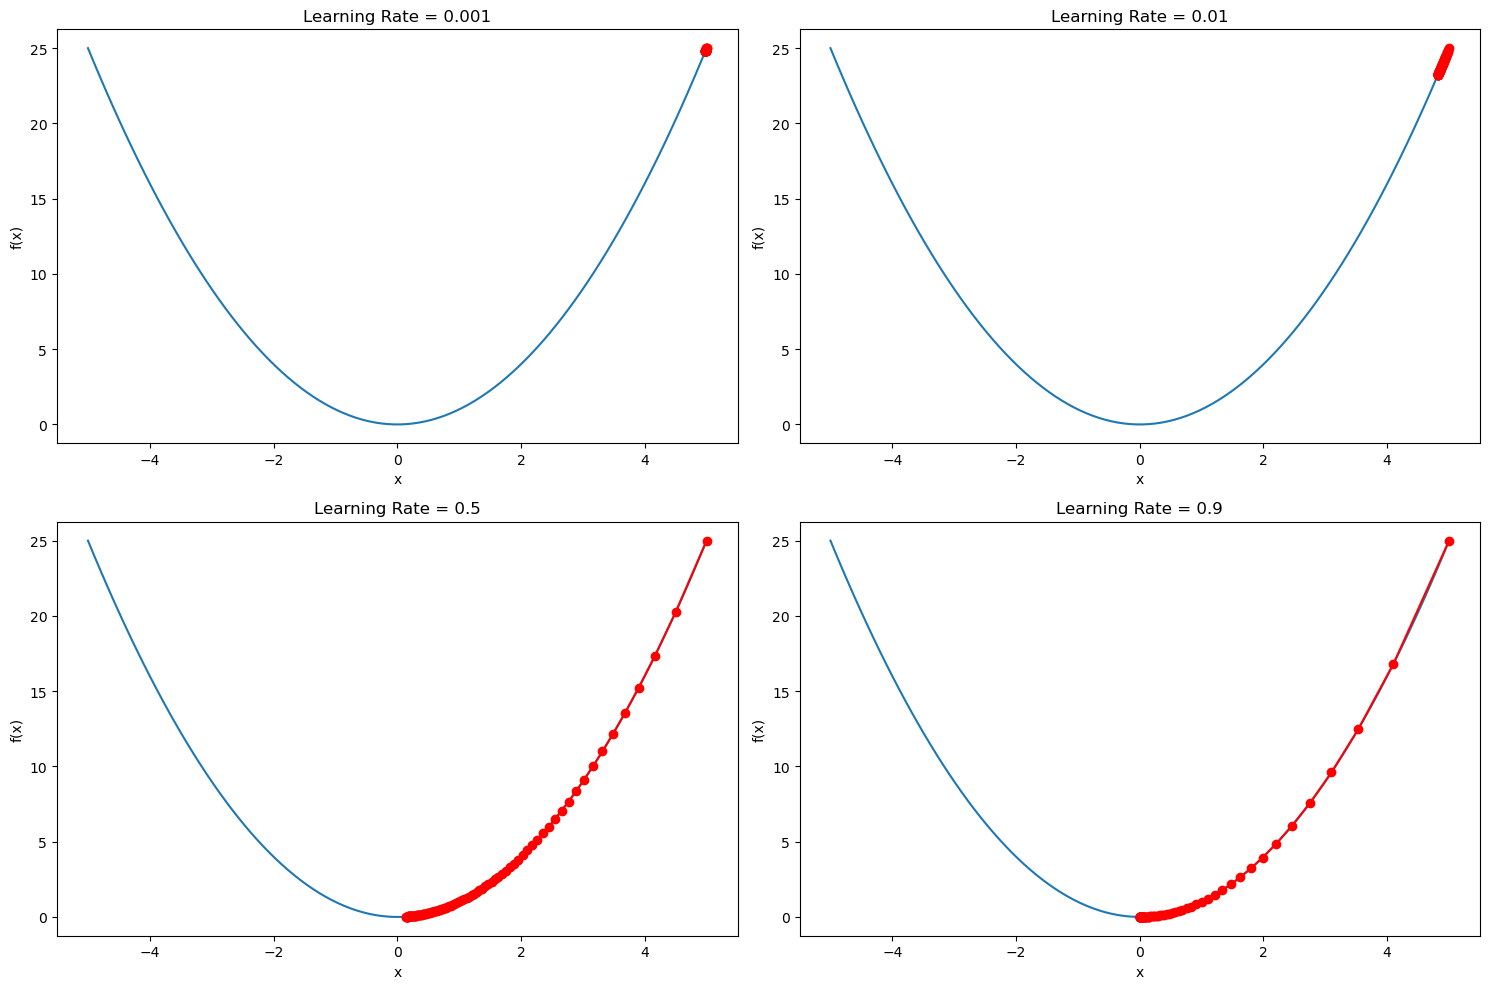

In [86]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = AdaptiveGradientOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

### RMSprop Optimizer

In [87]:
# Create an instance of the optimizer
optimizer = RMSpropOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

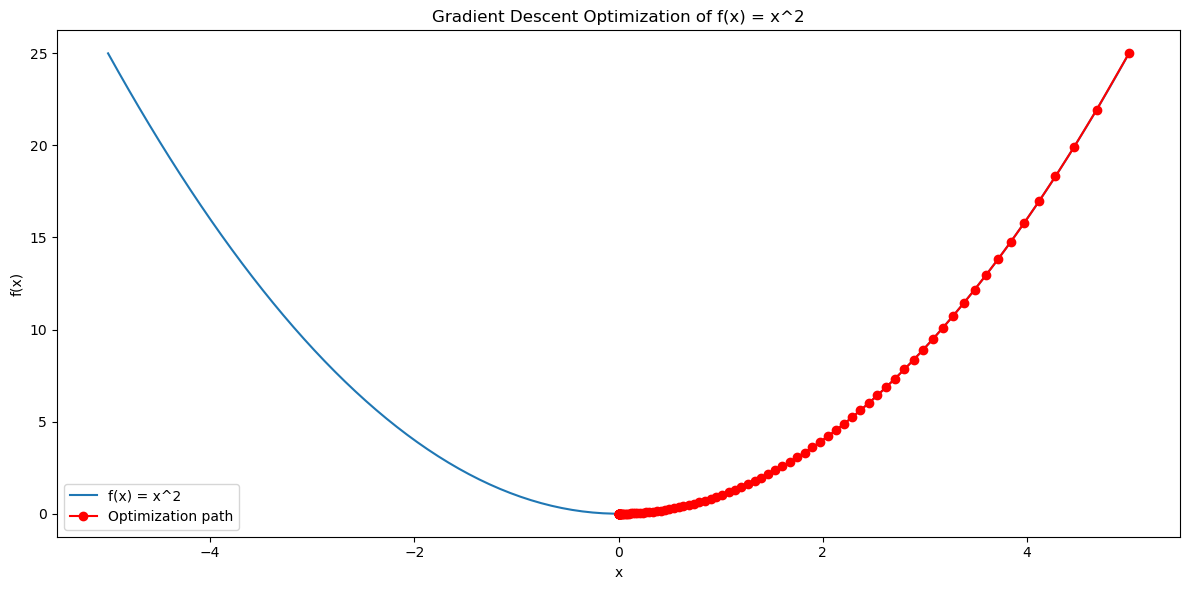

In [88]:
# Create an instance of the optimizer
optimizer = RMSpropOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

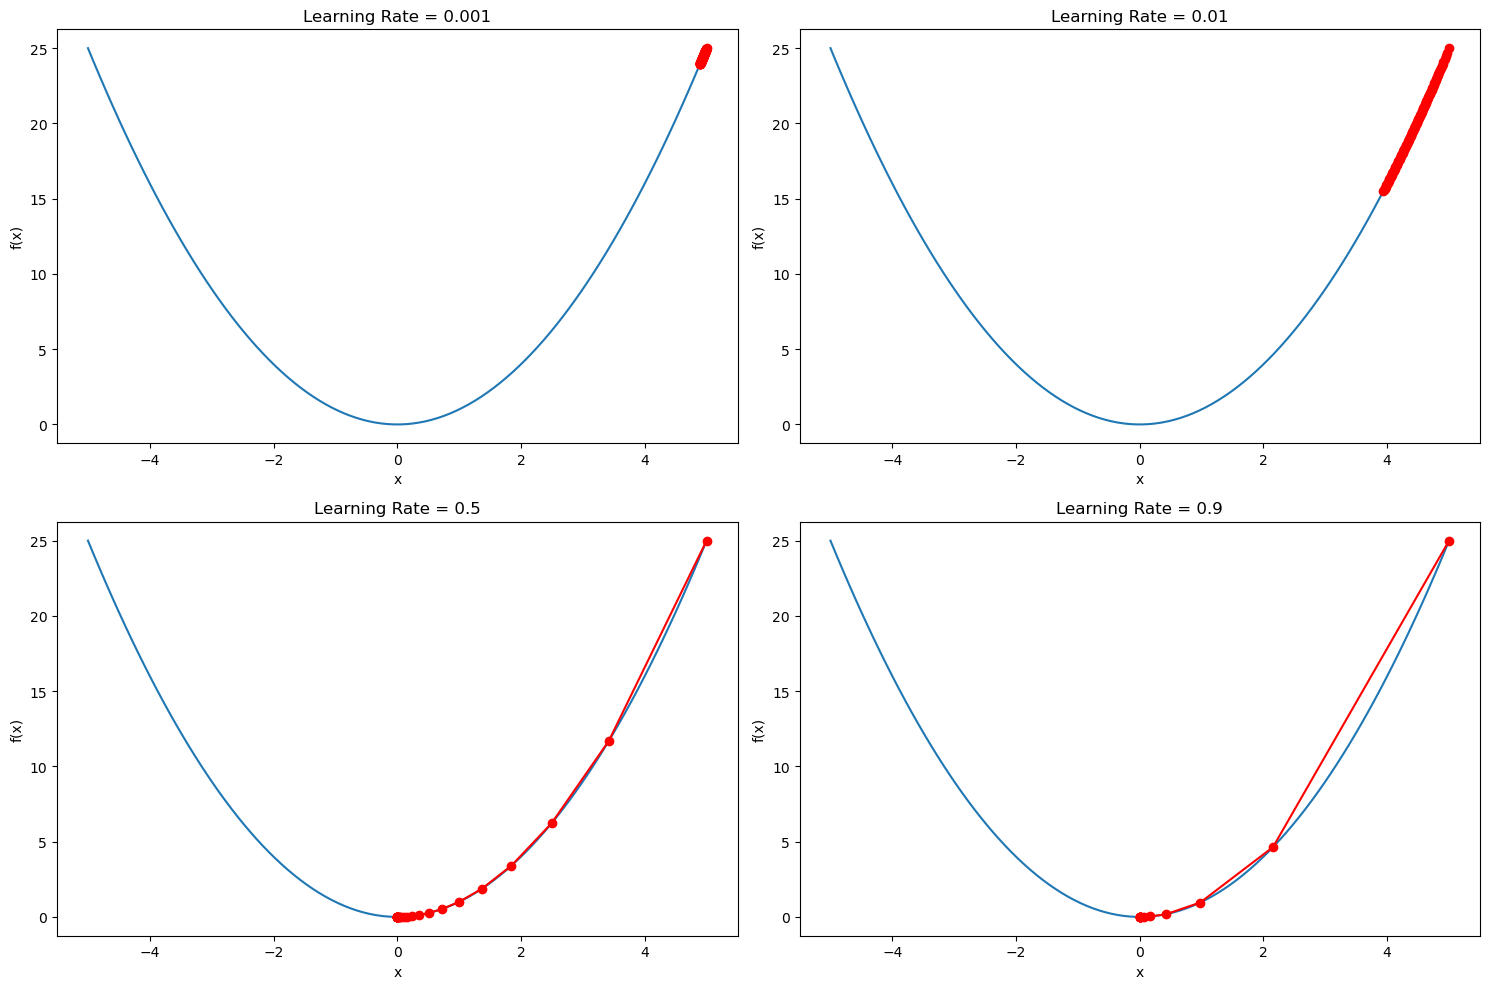

In [89]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = RMSpropOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

### Adaptive Moment Estimation Optimizer

In [90]:
# Create an instance of the optimizer
optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

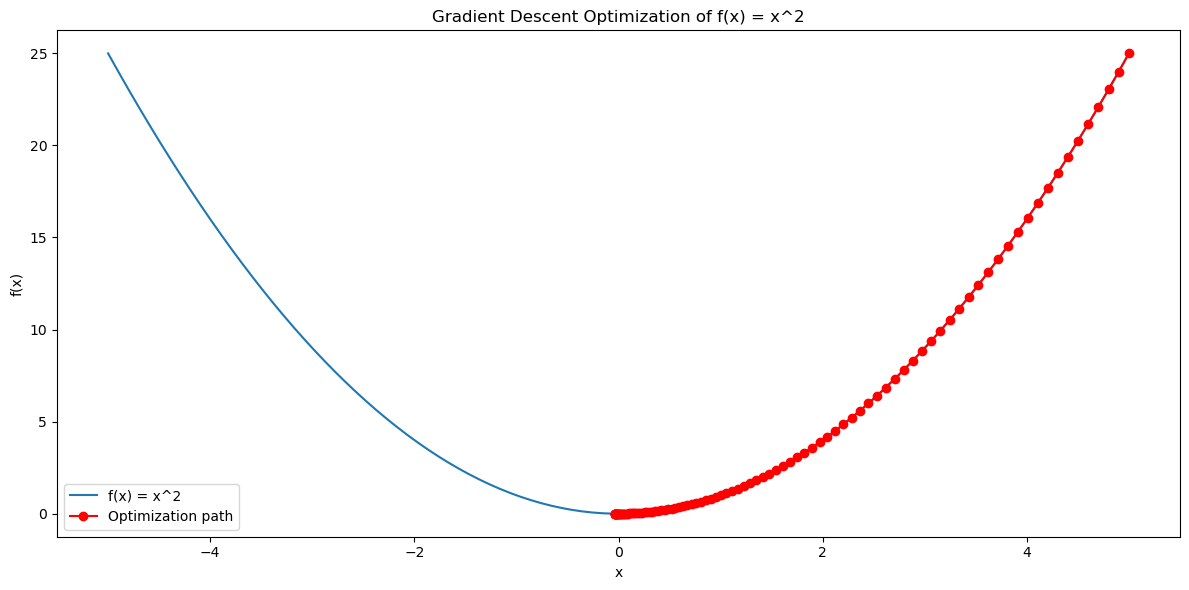

In [91]:
# Create an instance of the optimizer
optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

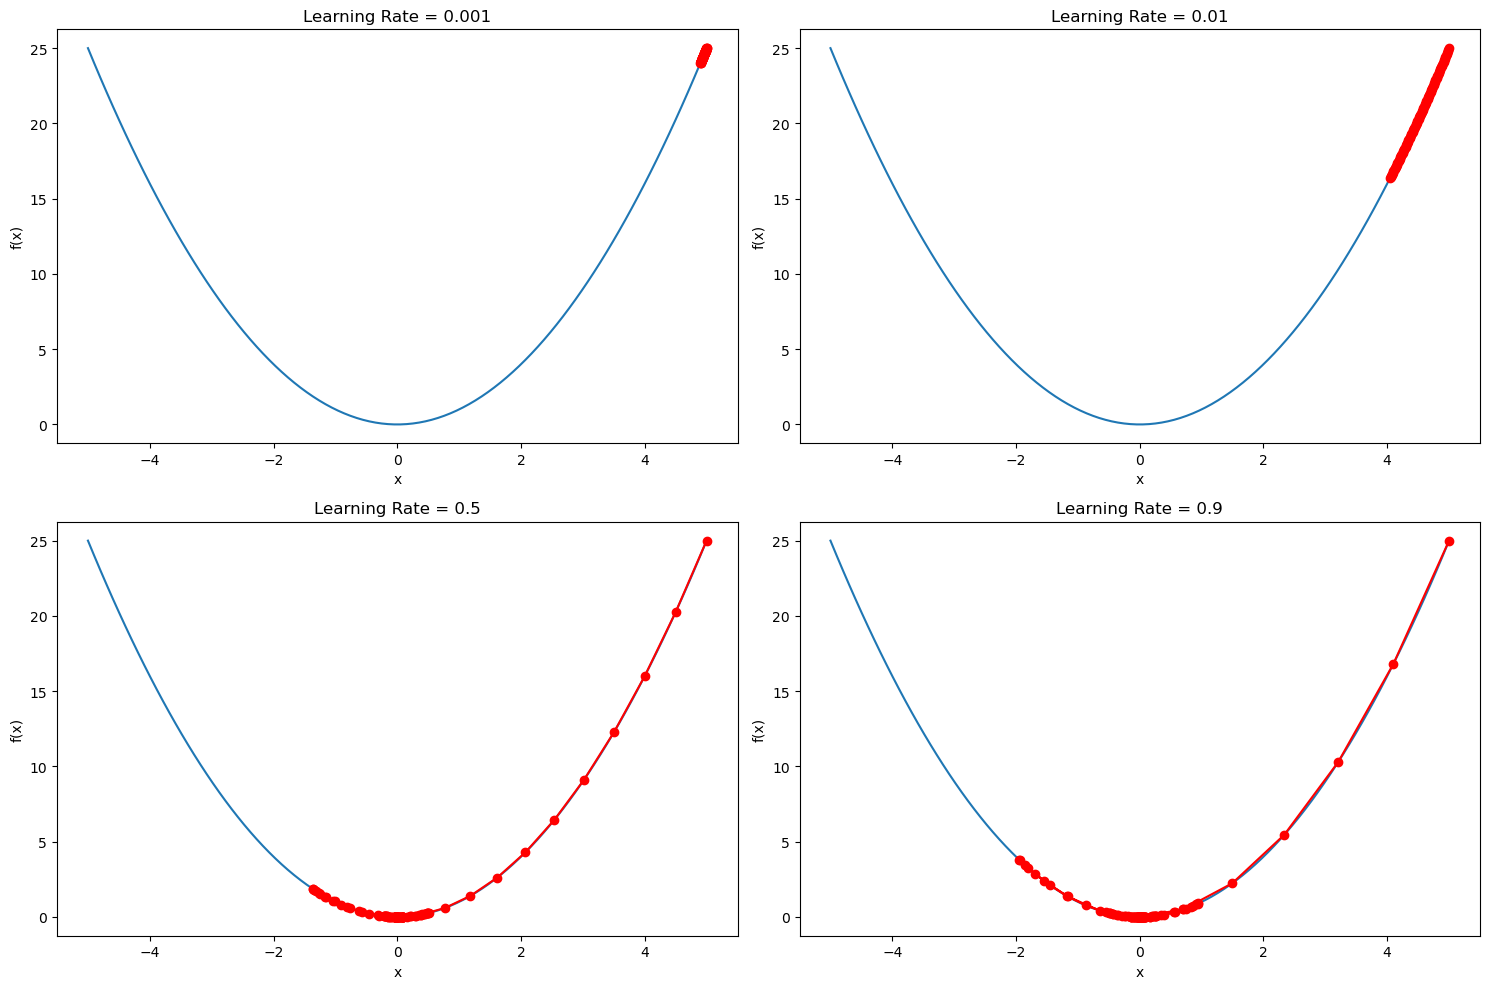

In [92]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

# Gradient Descent Optimization of the Function $ f(x, y) = x^2 + y^2 $

This section expands the analysis to a two-dimensional quadratic cost function $ f(x, y) = x^2 + y^2 $, which has a global minimum at $ (x, y) = (0, 0) $. The gradient of this function is $ f'(x, y) = [2x, 2y] $.

The convergence and optimization paths of various gradient descent algorithms are explored using this function. A 3D surface plot of $ f(x, y) $ is generated to visualize the shape of the cost landscape. Each optimizer’s path is shown as it converges toward the minimum, both on the surface plot and on contour plots. The contour plots provide insights into the efficiency, stability, and adaptability of each algorithm under a simple, convex optimization scenario.

Additionally, the maximum number of iterations has been increased to `10000` for the **Adaptive Gradient Optimizer** to allow its complete convergence to the global minimum, demonstrating the optimizer’s effectiveness when given sufficient iterations.

In [93]:
# Define the cost function: f(x,y)=x^2 + y^2
def cost_function(params):
    x, y = params
    return x**2 + y**2


# Define the gradient of the cost function: f'(x,y) = [2x,2y]
def gradient_function(params):
    x, y = params
    return [2 * x, 2 * y]

Text(0.5, 0.92, '3D Surface Plot of f(x, y) = x^2 + y^2')

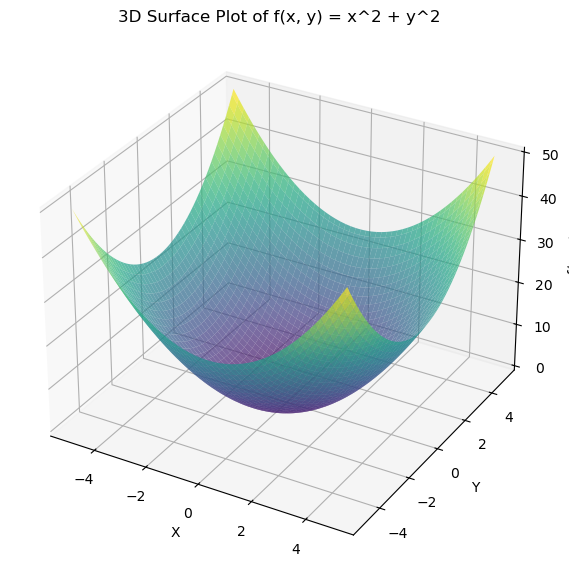

In [94]:
# Create the 3D plot of the function f(x, y) = x^2 + y^2
fig = plt.figure(figsize=(10, 7))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Create a grid of values for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("3D Surface Plot of f(x, y) = x^2 + y^2")

### Momentum GradientDescent Optimizer

In [95]:
# Create an instance of the optimizer
optimizer = MomentumGradientDescentOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

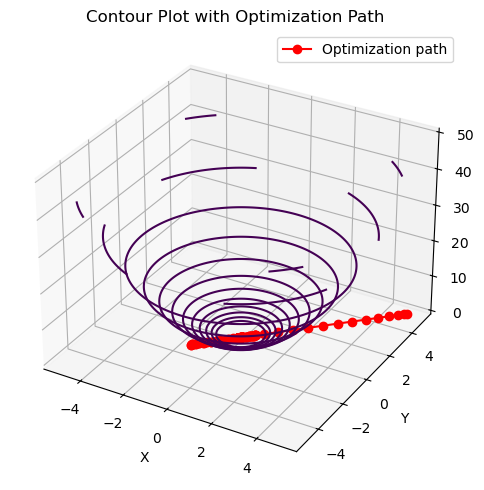

In [96]:
fig = plt.figure(figsize=(8, 5))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Plot the contour of the function
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot with Optimization Path")
ax.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

### Nesterov Accelerated Gradient Optimizer

In [97]:
# Create an instance of the optimizer
optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

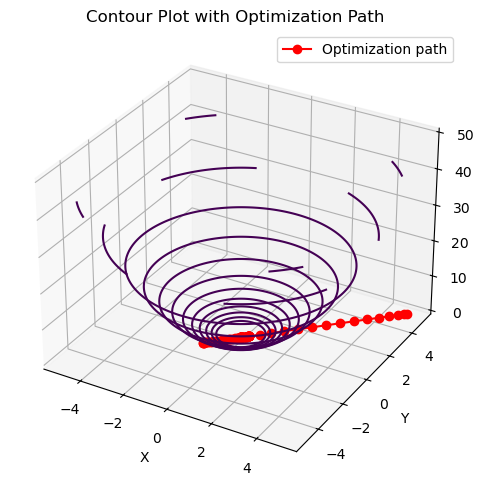

In [98]:
fig = plt.figure(figsize=(8, 5))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Plot the contour of the function
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot with Optimization Path")
ax.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

### Adaptive Gradient Optimizer

In [99]:
# Create an instance of the optimizer
optimizer = AdaptiveGradientOptimizer(learning_rate=0.1, max_iterations=10000, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

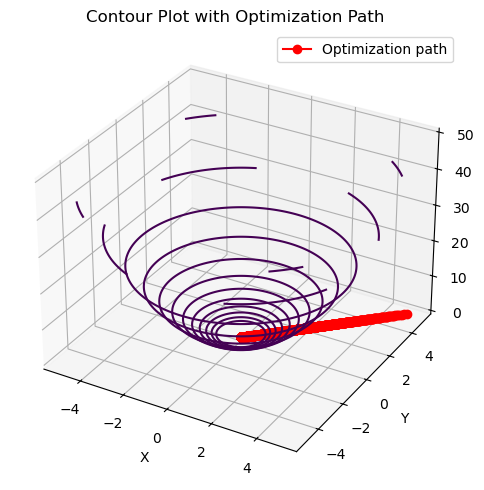

In [100]:
fig = plt.figure(figsize=(8, 5))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Plot the contour of the function
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot with Optimization Path")
ax.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

### RMSprop Optimizer

In [101]:
# Create an instance of the optimizer
optimizer = RMSpropOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

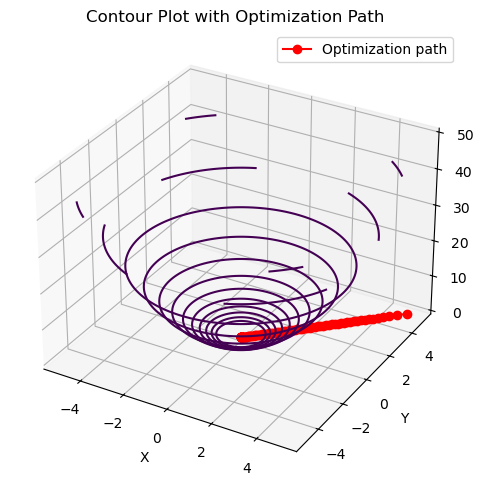

In [102]:
fig = plt.figure(figsize=(8, 5))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Plot the contour of the function
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot with Optimization Path")
ax.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

### Adaptive Moment Estimation Optimizer

In [103]:
# Create an instance of the optimizer
optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

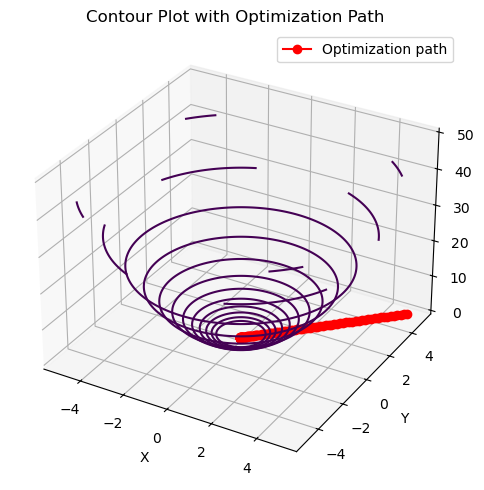

In [104]:
fig = plt.figure(figsize=(8, 5))

# First figure: 3D surface plot
ax = fig.add_subplot(projection="3d")

# Plot the contour of the function
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot with Optimization Path")
ax.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

# Linear Regression with Gradient Descent Optimization

In this section, gradient descent optimization algorithms are applied to a linear regression problem. The goal of linear regression is to fit a line that minimizes the mean squared error (MSE) between the predictions and actual target values.

### Cost Function (MSE)

The cost function for linear regression is defined as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$

where $ h_{\theta}(x) $ represents the predictions, $ y $ the actual values, and $ m $ the number of training examples.

### Gradient of the Cost Function

The gradient of the cost function, used to update model parameters, is given by:

$$
\nabla_{\theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

### Implementation and Evaluation

1. **Data Preparation**: 
   - Randomly generated data is used to simulate a feature matrix $ X $ and target vector $ y $, with an intercept term added to $ X $.
   - The data is split into training and test sets to evaluate each optimizer's performance.

2. **Optimizers Applied**: 
   - The following optimizers are used to minimize the cost function:
     - **Momentum Gradient Descent**
     - **Nesterov Accelerated Gradient**
     - **AdaGrad**
     - **RMSprop**
     - **Adam**

3. **Metrics Collected**:
   - For each optimizer, the following metrics are recorded:
     - Final training cost (MSE)
     - Test set cost (MSE)
     - Number of iterations until convergence

4. **Results Comparison**:
   - A table summarizes the performance of each optimizer, highlighting their convergence rates and accuracy on both the training and test sets. This comparison demonstrates each optimizer’s effectiveness in terms of convergence speed and final accuracy for linear regression.


In [105]:
# Define the cost function (MSE) for linear regression
def linear_regression_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


# Define the gradient for linear regression
def linear_regression_gradient(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1 / m) * X.T.dot(predictions - y)
    return gradient

In [106]:
np.random.seed(42)
# Generate random data: X as feature matrix and y as target vector
# Ease of interpretation but poor representativeness of real data
X = np.random.rand(10000, 10)  # Feature matrix (10000 samples, 10 features)
y = np.random.rand(10000)  # Target vector (10000 samples)
# Add a column of ones to X for the intercept term (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

limit = int(0.8 * 10000)

# Split the indices for train and test
train_index = np.arange(limit)
test_index = np.arange(limit, 10000)

# Split X and y into Train and Test sets
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

### Momentum GradientDescent Optimizer

In [107]:
initial_theta = np.zeros(
    X.shape[1]
)  # Initial parameters, these are the model parameters (or weights) that it's going to optimize

optimizer = MomentumGradientDescentOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: linear_regression_cost(theta, X_train, y_train),
    lambda theta: linear_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [108]:
conver_rate_momentum = len(cost_history)

train_cost_momentum = cost_history[-1][1]

test_cost_momentum = linear_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (MSE) for Momentum Gradient Descent: {test_cost_momentum}")

Test set cost (MSE) for Momentum Gradient Descent: 0.04226159354882178


### Nesterov Accelerated Gradient Optimizer

In [109]:
initial_theta = np.zeros(
    X.shape[1]
)  # Initial parameters, these are the model parameters (or weights) that it's going to optimize

optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: linear_regression_cost(theta, X_train, y_train),
    lambda theta: linear_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [110]:
conver_rate_nesterov = len(cost_history)

train_cost_nesterov = cost_history[-1][1]

test_cost_nesterov = linear_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (MSE) for Momentum Gradient Descent: {test_cost_nesterov}")

Test set cost (MSE) for Momentum Gradient Descent: 0.04226159423435945


### Adaptive Gradient Optimizer

In [111]:
initial_theta = np.zeros(
    X.shape[1]
)  # Initial parameters, these are the model parameters (or weights) that it's going to optimize

optimizer = AdaptiveGradientOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: linear_regression_cost(theta, X_train, y_train),
    lambda theta: linear_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [112]:
conver_rate_adagrad = len(cost_history)

train_cost_adagrad = cost_history[-1][1]

test_cost_adagrad = linear_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (MSE) for Momentum Gradient Descent: {test_cost_adagrad}")

Test set cost (MSE) for Momentum Gradient Descent: 0.04226232307424019


### RMSprop Optimizer

In [113]:
initial_theta = np.zeros(
    X.shape[1]
)  # Initial parameters, these are the model parameters (or weights) that it's going to optimize

optimizer = RMSpropOptimizer(learning_rate=0.01, max_iterations=1000000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: linear_regression_cost(theta, X_train, y_train),
    lambda theta: linear_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [114]:
conver_rate_rmsprop = len(cost_history)

train_cost_rmsprop = cost_history[-1][1]

test_cost_rmsprop = linear_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (MSE) for Momentum Gradient Descent: {test_cost_rmsprop}")

Test set cost (MSE) for Momentum Gradient Descent: 0.04267807447449606


### Adaptive Moment Estimation Optimizer

In [115]:
initial_theta = np.zeros(
    X.shape[1]
)  # Initial parameters, these are the model parameters (or weights) that it's going to optimize

optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: linear_regression_cost(theta, X_train, y_train),
    lambda theta: linear_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [116]:
conver_rate_adam = len(cost_history)

train_cost_adam = cost_history[-1][1]

test_cost_adam = linear_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (MSE) for Momentum Gradient Descent: {test_cost_adam}")

Test set cost (MSE) for Momentum Gradient Descent: 0.04225923070418634


### Comparations

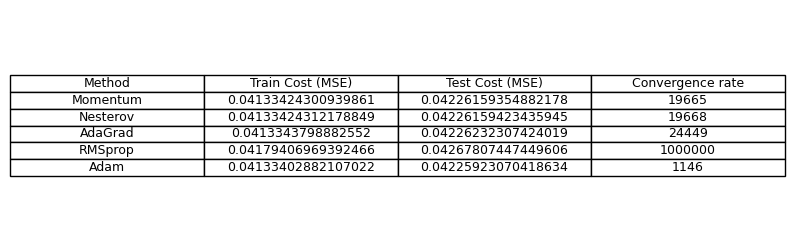

In [117]:
data = {
    "Method": ["Momentum", "Nesterov", "AdaGrad", "RMSprop", "Adam"],
    "Train Cost (MSE)": [
        train_cost_momentum,
        train_cost_nesterov,
        train_cost_adagrad,
        train_cost_rmsprop,
        train_cost_adam,
    ],
    "Test Cost (MSE)": [test_cost_momentum, test_cost_nesterov, test_cost_adagrad, test_cost_rmsprop, test_cost_adam],
    "Convergence rate": [
        conver_rate_momentum,
        conver_rate_nesterov,
        conver_rate_adagrad,
        conver_rate_rmsprop,
        conver_rate_adam,
    ],
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

plt.show()

# Logistic Regression with Gradient Descent Optimization

This section applies gradient descent optimization algorithms to a logistic regression classification problem. Logistic regression aims to classify data into two classes by applying a logistic (sigmoid) function and minimizing the log-loss (cross-entropy loss).

### Cost Function (Cross-Entropy Loss)

The cost function for logistic regression is defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
$$

where $ h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}} $ is the sigmoid function, $ y $ is the actual label, and $ m $ is the number of training examples.

### Gradient of the Cost Function

The gradient of the cost function, which is used to update the model parameters, is given by:

$$
\nabla_{\theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

### Implementation and Evaluation

1. **Data Preparation**:
   - A dataset is generated with a feature matrix $ X $ and a binary target vector $ y $. An intercept term is added to $ X $.
   - The data is split into training and test sets to evaluate the performance of each optimizer.

2. **Optimizers Applied**:
   - The following optimizers are employed to minimize the logistic regression cost function:
     - **Momentum Gradient Descent**
     - **Nesterov Accelerated Gradient**
     - **AdaGrad**
     - **RMSprop**
     - **Adam**

3. **Metrics Collected**:
   - For each optimizer, the following metrics are recorded:
     - Final training cost (log-loss)
     - Test set cost (log-loss)
     - Number of iterations until convergence

4. **Results Comparison**:
   - A summary table presents the performance of each optimizer, highlighting their convergence rates and accuracy on both training and test sets. This comparison illustrates each optimizer's efficiency and suitability for binary classification tasks using logistic regression.


In [118]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Define the cost function (Cross-Entropy Loss) for logistic regression
def logistic_regression_cost(theta, X, y):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


# Define the gradient for logistic regression
def logistic_regression_gradient(theta, X, y):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    gradient = (1 / m) * X.T.dot(predictions - y)
    return gradient

In [119]:
# Generate random data for logistic regression
np.random.seed(42)
X = np.random.rand(10000, 10)  # Feature matrix (10000 samples, 10 features)
y = np.random.randint(0, 2, 10000)  # Binary target vector (10000 samples, 0 or 1)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add a column of ones for the intercept

# Split the data into training and test sets (80% train, 20% test)
limit = int(0.8 * 10000)
train_index = np.arange(limit)
test_index = np.arange(limit, 10000)

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

### Momentum Gradient Descent Optimizer

In [120]:
initial_theta = np.zeros(X.shape[1])

optimizer = MomentumGradientDescentOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: logistic_regression_cost(theta, X_train, y_train),
    lambda theta: logistic_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [121]:
conver_rate_momentum = len(cost_history)

train_cost_momentum = cost_history[-1][1]

test_cost_momentum = logistic_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (Log Loss) for Momentum Gradient Descent: {test_cost_momentum}")

Test set cost (Log Loss) for Momentum Gradient Descent: 0.693291131096965


### Nesterov Accelerated Gradient Optimizer

In [122]:
initial_theta = np.zeros(X.shape[1])

optimizer = NesterovAcceleratedGradientOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: logistic_regression_cost(theta, X_train, y_train),
    lambda theta: logistic_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [123]:
conver_rate_nesterov = len(cost_history)

train_cost_nesterov = cost_history[-1][1]

test_cost_nesterov = logistic_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (Log Loss) for Momentum Gradient Descent: {test_cost_nesterov}")

Test set cost (Log Loss) for Momentum Gradient Descent: 0.6932911287344002


### Adaptive Gradient Optimizer

In [124]:
initial_theta = np.zeros(X.shape[1])

optimizer = AdaptiveGradientOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: logistic_regression_cost(theta, X_train, y_train),
    lambda theta: logistic_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [125]:
conver_rate_adagrad = len(cost_history)

train_cost_adagrad = cost_history[-1][1]

test_cost_adagrad = logistic_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (Log Loss) for Momentum Gradient Descent: {test_cost_adagrad}")

Test set cost (Log Loss) for Momentum Gradient Descent: 0.6933315913757765


### RMSprop Optimizer

In [126]:
initial_theta = np.zeros(X.shape[1])

optimizer = RMSpropOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: logistic_regression_cost(theta, X_train, y_train),
    lambda theta: logistic_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [127]:
conver_rate_rmsprop = len(cost_history)

train_cost_rmsprop = cost_history[-1][1]

test_cost_rmsprop = logistic_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (Log Loss) for Momentum Gradient Descent: {test_cost_rmsprop}")

Test set cost (Log Loss) for Momentum Gradient Descent: 0.6937392847825216


### Adaptive Moment Estimation Optimizer

In [128]:
initial_theta = np.zeros(X.shape[1])

optimizer = AdaptiveMomentEstimationOptimizer(learning_rate=0.01, max_iterations=100000, tolerance=1e-6)
optimal_theta, cost_history = optimizer.optimize(
    lambda theta: logistic_regression_cost(theta, X_train, y_train),
    lambda theta: logistic_regression_gradient(theta, X_train, y_train),
    initial_theta,
)

In [129]:
conver_rate_adam = len(cost_history)

train_cost_adam = cost_history[-1][1]

test_cost_adam = logistic_regression_cost(optimal_theta, X_test, y_test)
print(f"Test set cost (Log Loss) for Momentum Gradient Descent: {test_cost_adam}")

Test set cost (Log Loss) for Momentum Gradient Descent: 0.6933321427753891


### Comparations

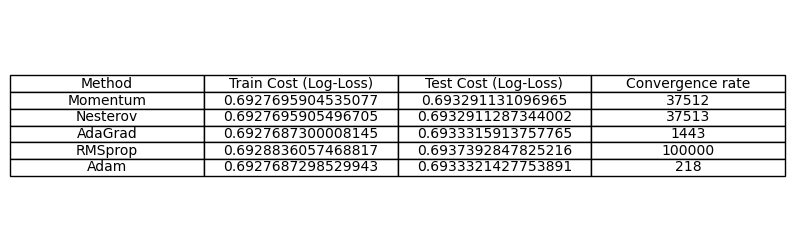

In [130]:
data = {
    "Method": ["Momentum", "Nesterov", "AdaGrad", "RMSprop", "Adam"],
    "Train Cost (Log-Loss)": [
        train_cost_momentum,
        train_cost_nesterov,
        train_cost_adagrad,
        train_cost_rmsprop,
        train_cost_adam,
    ],
    "Test Cost (Log-Loss)": [
        test_cost_momentum,
        test_cost_nesterov,
        test_cost_adagrad,
        test_cost_rmsprop,
        test_cost_adam,
    ],
    "Convergence rate": [
        conver_rate_momentum,
        conver_rate_nesterov,
        conver_rate_adagrad,
        conver_rate_rmsprop,
        conver_rate_adam,
    ],
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

plt.show()

# Observations and Conclusions

The experiments reveal that Adam consistently converges fastest in both linear and logistic regression, making it ideal for quick optimizations. However, AdaGrad showed competitive convergence, especially in logistic regression, due to its adaptive learning rate, achieving reasonable test costs across tasks.

Momentum Gradient Descent and Nesterov Accelerated Gradient offered stable performance but required more iterations, highlighting their reliability over speed. RMSprop, on the other hand, had the slowest convergence and higher test costs, making it less suitable in these cases.

In short, Adam is preferred for rapid convergence, AdaGrad balances adaptability and stability, while Momentum and Nesterov are reliable but slower options.
